In [9]:
# /content/sample_data/customer_support_tickets.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
data = pd.read_csv("/content/sample_data/customer_support_tickets.csv")

print("Available columns in the dataset:")
print(data.columns.tolist())

columns_to_check = ['Resolution', 'First Response', 'Time to Response']
existing_columns = [col for col in columns_to_check if col in data.columns]

if len(existing_columns) < len(columns_to_check):
    missing_cols = set(columns_to_check) - set(existing_columns)
    print(f"\nWarning: The following columns were not found and will be skipped: {missing_cols}")

if not existing_columns:
    raise ValueError("None of the specified columns exist in the dataset")

data[existing_columns] = data[existing_columns].replace(['', ' ', None, 'Not Given'], np.nan)

data_cleaned = data.dropna(subset=existing_columns)

null_counts = data_cleaned.isnull().sum()
print("\nNull value counts after cleaning:")
print(null_counts)

duplicate_count = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicates: {duplicate_count}")

data_cleaned.to_csv("data.csv", index=False)

print("\nData cleaning complete. Cleaned data saved to 'data.csv'")

Available columns in the dataset:
['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


Null value counts after cleaning:
Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

Number of dup

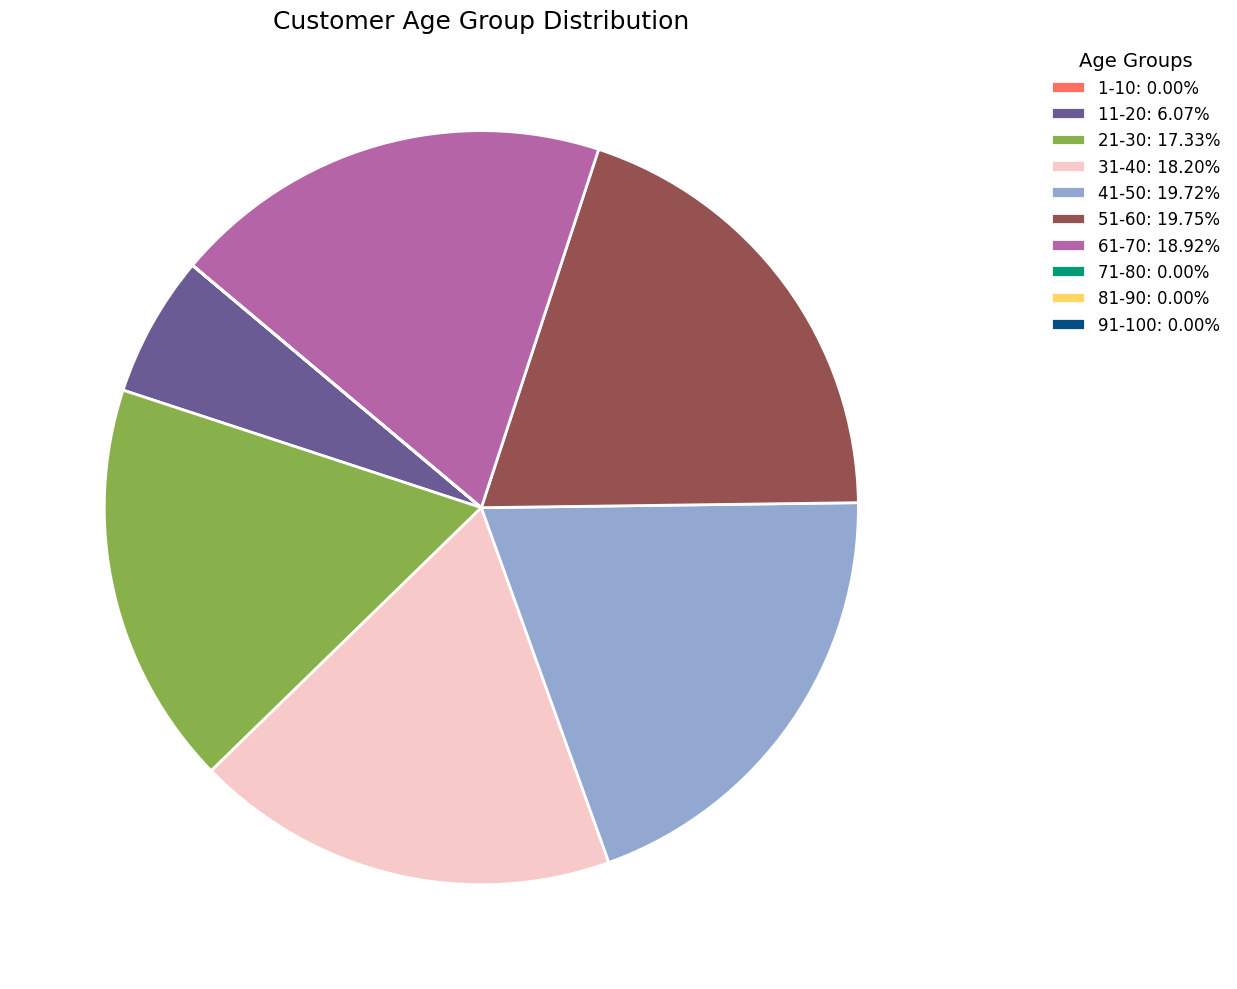

In [5]:
df = pd.read_csv('data.csv')

bins = range(0, 101, 10)
labels = [f'{i+1}-{i+10}' for i in range(0, 100, 10)]
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=True, include_lowest=True)

age_group_counts = df['Age Group'].value_counts().sort_index()

age_groups = age_group_counts.index.tolist()
counts = age_group_counts.values
percentages = (counts / counts.sum()) * 100
colors = [
    '#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9',
    '#92A8D1', '#955251', '#B565A7', '#009B77',
    '#FFD662', '#034F84', '#F7786B', '#DE7A22'
]

fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    percentages,
    labels=None,
    autopct=None,
    startangle=140,
    colors=colors[:len(age_groups)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.title('Customer Age Group Distribution', fontsize=18)
plt.tight_layout()

legend_labels = []
for group, pct in zip(age_groups, percentages):
    legend_labels.append(f"{group}: {pct:.2f}%")

ax.legend(wedges, legend_labels, title="Age Groups", loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=12, title_fontsize=14, frameon=False)



plt.show()

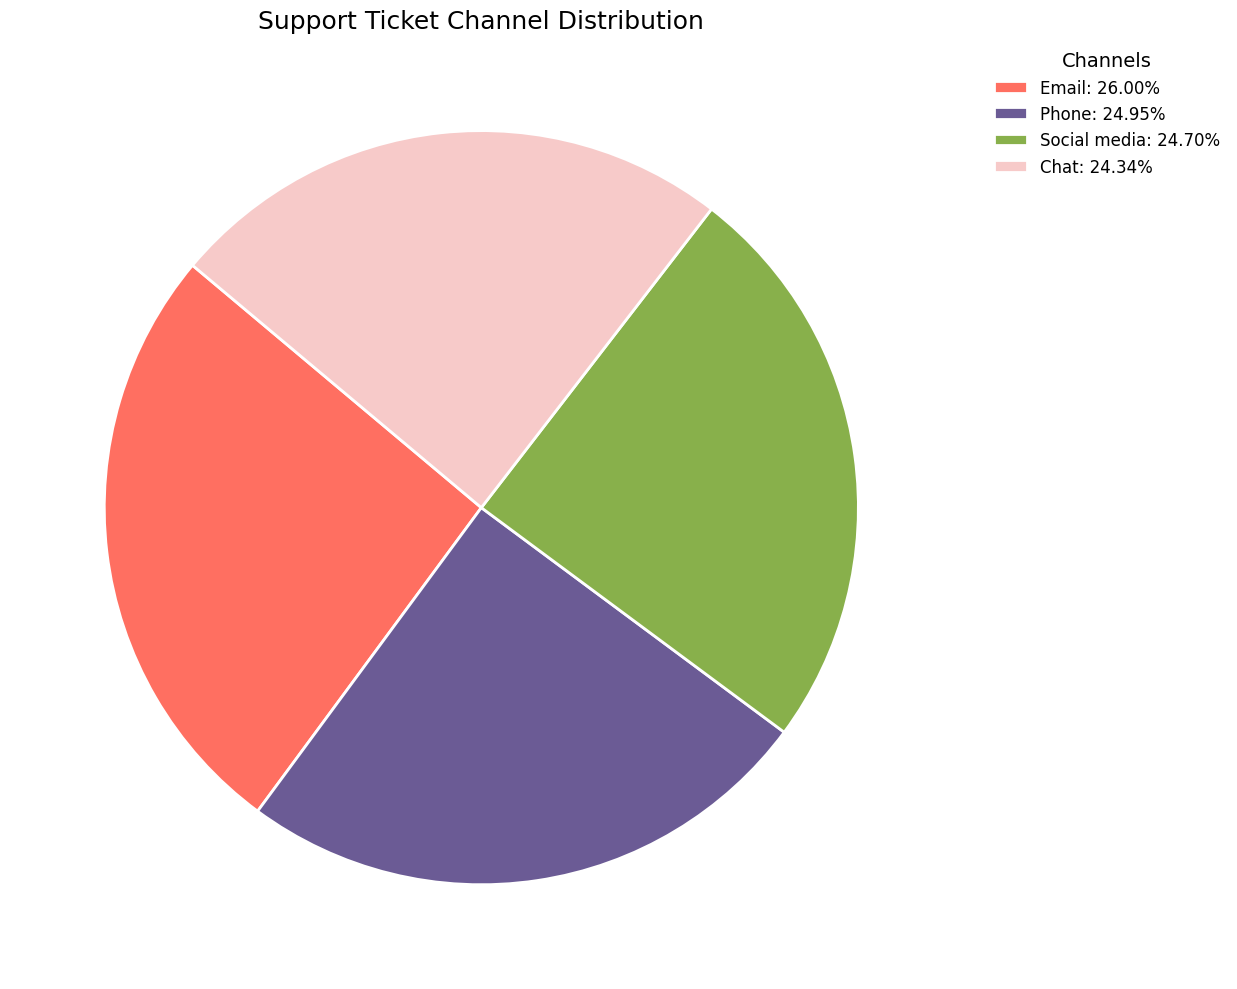

In [6]:
df = pd.read_csv('data.csv')

platform_counts = df['Ticket Channel'].value_counts()

channels = platform_counts.index.tolist()
counts = platform_counts.values
percentages = (counts / counts.sum()) * 100
colors = [
    '#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9',
    '#92A8D1', '#955251', '#B565A7', '#009B77',
    '#FFD662', '#034F84', '#F7786B', '#DE7A22'
]

fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    percentages,
    labels=None,
    autopct=None,
    startangle=140,
    colors=colors[:len(channels)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.title('Support Ticket Channel Distribution', fontsize=18)
plt.tight_layout()

legend_labels = []
for channel, pct in zip(channels, percentages):
    legend_labels.append(f"{channel}: {pct:.2f}%")

ax.legend(wedges, legend_labels, title="Channels", loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=12, title_fontsize=14, frameon=False)


plt.show()


/tmp/ipython-input-7-3236379102.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['Age Group', 'Customer Gender']).size().unstack(fill_value=0)


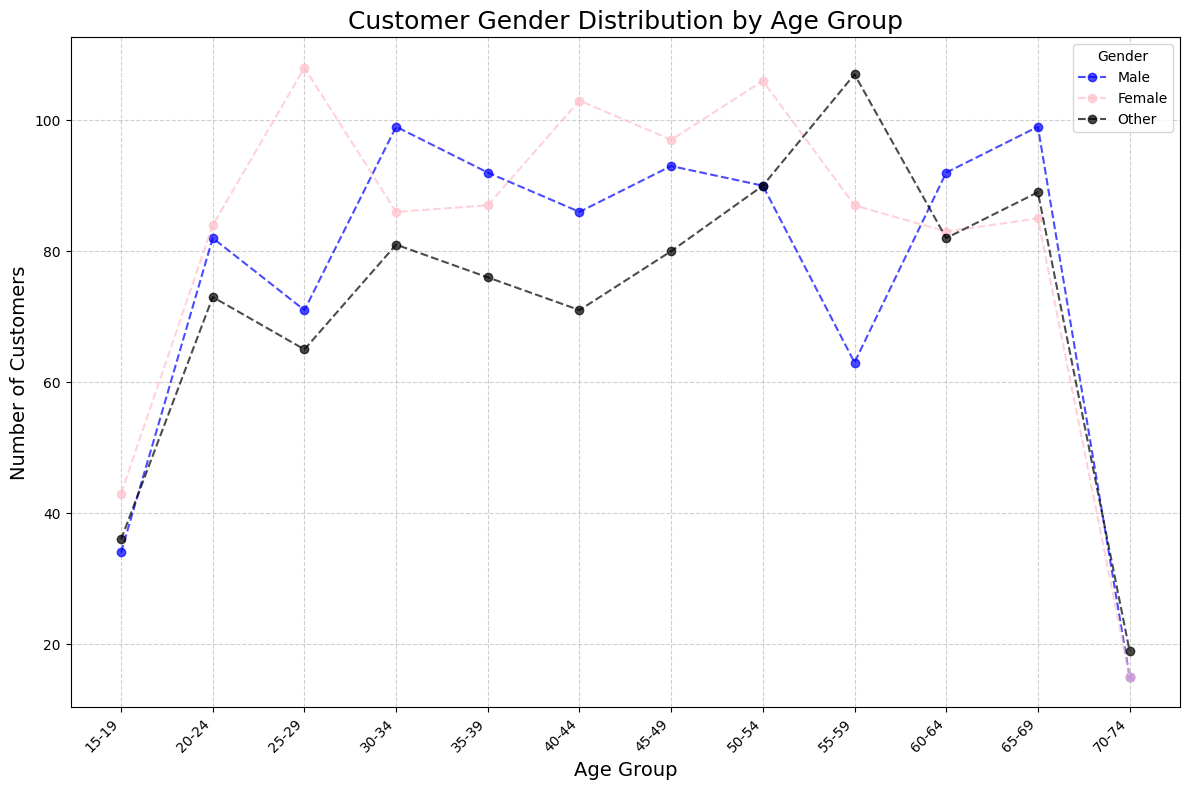

In [7]:
df = pd.read_csv('data.csv')

min_age = df['Customer Age'].min()
max_age = df['Customer Age'].max()
start_bin = (min_age // 5) * 5
end_bin = ((max_age // 5) + 1) * 5
bins = range(start_bin, end_bin + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False, include_lowest=True)

age_gender_counts = df.groupby(['Age Group', 'Customer Gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 8))

colors = {
    'Male': 'blue',
    'Female': 'pink',
    'Other': 'black'
}

for gender in colors.keys():
    if gender in age_gender_counts.columns:
        ax.plot(age_gender_counts.index, age_gender_counts[gender], marker='o', linestyle='--', color=colors[gender], label=gender, alpha=0.7)

ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)
ax.set_title('Customer Gender Distribution by Age Group', fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Gender")
plt.tight_layout()


plt.show()

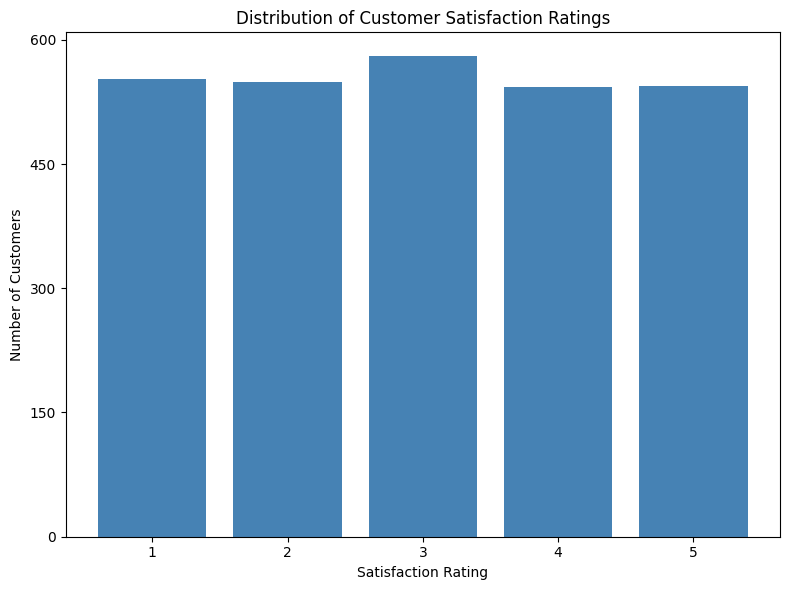

In [10]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

ratings_counts = data['Customer Satisfaction Rating'].value_counts().sort_index()


plt.figure(figsize=(8, 6))
plt.bar(ratings_counts.index, ratings_counts.values, color='steelblue')

plt.xlabel('Satisfaction Rating')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Satisfaction Ratings')

plt.xticks(ratings_counts.index)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
plt.ylim(bottom=0)

plt.tight_layout()

plt.show()


In [12]:
df = pd.read_csv('data.csv')
ages = df['Customer Age']

mean_age = ages.mean()
median_age = ages.median()
mode_age = ages.mode()[0]

print(f"Mean Customer Age: {mean_age:.2f}")
print(f"Median Customer Age: {median_age:.2f}")
print(f"Mode Customer Age: {mode_age:.2f}")

Mean Customer Age: 44.33
Median Customer Age: 45.00
Mode Customer Age: 34.00
